In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_excel('E1.xlsx')
df2 = pd.read_excel('E2.xlsx')
df3 = pd.read_excel('E3.xlsx')

In [7]:
df

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922
...,...,...,...
65,Tom Hanks,M,1956
66,Tony Bennett,M,1926
67,Wayne Newton,M,1942
68,Will Smith,M,1968


In [8]:
df2

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0
...,...,...,...,...
65,Tom Hanks,1984,Splash,1993.0
66,Tony Bennett,1951,Because of You,1963.0
67,Wayne Newton,1972,"Daddy, Don't You Walk So Fast",NaN
68,Will Smith,1990,The Fresh Prince of Bel-Air,1988.0


In [9]:
df3

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN
...,...,...,...
65,Tom Hanks,2016,NaN
66,Tony Bennett,2016,NaN
67,Wayne Newton,2016,NaN
68,Will Smith,2016,NaN


Combine the 3 tables with Entertainer as foreign key


In [10]:
merged_df = pd.merge(df, df2, on='Entertainer')
final_df = pd.merge(merged_df, df3, on='Entertainer')

In [11]:
final_df

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN
...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,1956,1984,Splash,1993.0,2016,NaN
66,Tony Bennett,M,1926,1951,Because of You,1963.0,2016,NaN
67,Wayne Newton,M,1942,1972,"Daddy, Don't You Walk So Fast",NaN,2016,NaN
68,Will Smith,M,1968,1990,The Fresh Prince of Bel-Air,1988.0,2016,NaN


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Gender (traditional)                          70 non-null     object 
 2   Birth Year                                    70 non-null     int64  
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 4   Breakthrough Name                             70 non-null     object 
 5   Year of First Oscar/Grammy/Emmy               64 non-null     float64
 6   Year of Last Major Work (arguable)            70 non-null     int64  
 7   Year of Death                                 30 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.5+ KB


Age at Breakthrough/#1 Hit/Award Nomination

In [15]:
final_df['Age at Breakthrough'] = final_df['Year of Breakthrough/#1 Hit/Award Nomination'] - final_df['Birth Year']

Distribution of Age at Breakthrough/#1 Hit/Award Nomination

>



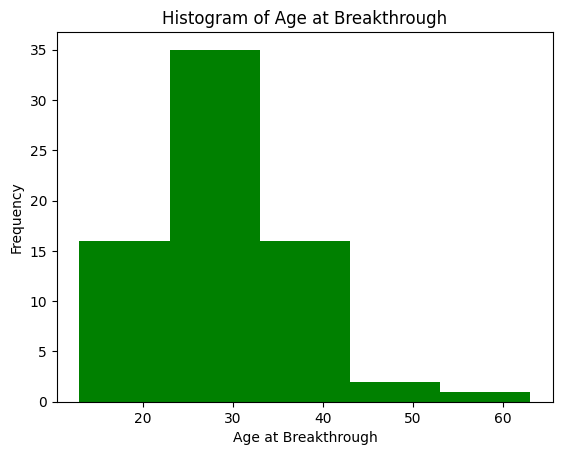

In [20]:
plt.hist(final_df['Age at Breakthrough'],bins = 5,color = 'green')
plt.xlabel('Age at Breakthrough')
plt.ylabel('Frequency')
plt.title('Histogram of Age at Breakthrough')
plt.show()

Two persons who breakthrough at age more than the upper bound


<Axes: xlabel='Gender (traditional)', ylabel='Age at Breakthrough'>

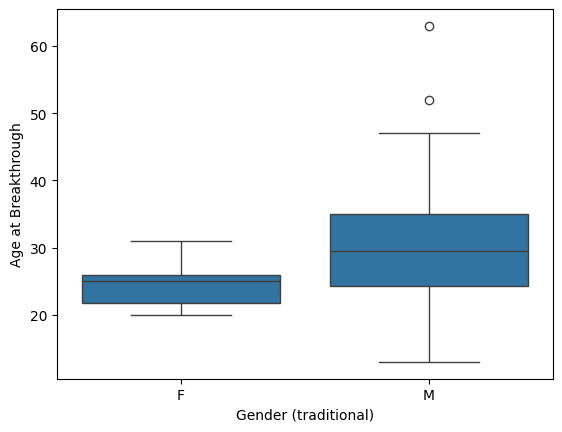

In [74]:
sns.boxplot(data=final_df, x='Gender (traditional)', y='Age at Breakthrough')

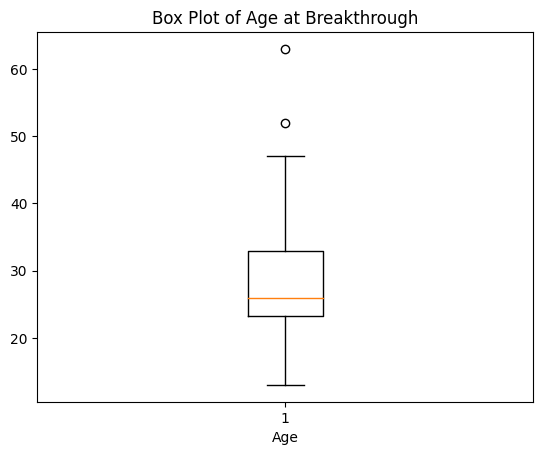

In [37]:
plt.boxplot(final_df['Age at Breakthrough'])
plt.title('Box Plot of Age at Breakthrough')
plt.xlabel('Age')
plt.show()

In [43]:

q1 = final_df["Age at Breakthrough"].quantile(0.25)
q3 = final_df["Age at Breakthrough"].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = (final_df["Age at Breakthrough"] < lower_bound) | (final_df["Age at Breakthrough"] > upper_bound)
print(final_df.loc[outliers, "Entertainer"])



48    Louis Armstrong
55     Morgan Freeman
Name: Entertainer, dtype: object


Male and Female counts

In [21]:
final_df['Gender (traditional)'].value_counts()


,count
Gender (traditional),
M,50
F,20


Carrear Span

In [22]:
final_df['Carrear_span'] = final_df['Year of Last Major Work (arguable)'] - final_df['Year of Breakthrough/#1 Hit/Award Nomination']

Carrear span distribution


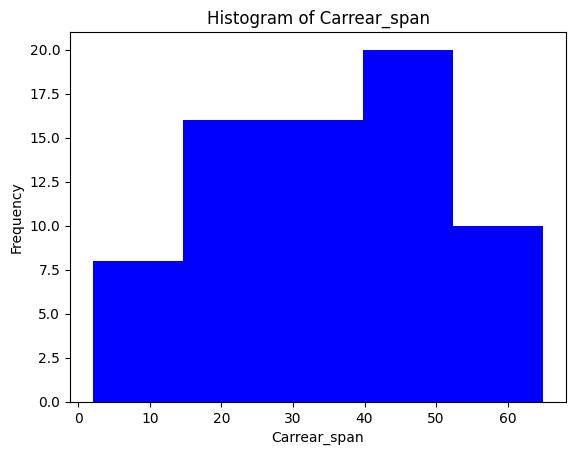

In [33]:
plt.hist(final_df['Carrear_span'],bins = 5,color = 'blue')
plt.xlabel('Carrear_span')
plt.ylabel('Frequency')
plt.title('Histogram of Carrear_span')
plt.show()

Trends in Breakthrough Years

<Axes: title={'center': 'Trends in Breakthrough Years'}, xlabel='Year of Breakthrough/#1 Hit/Award Nomination'>

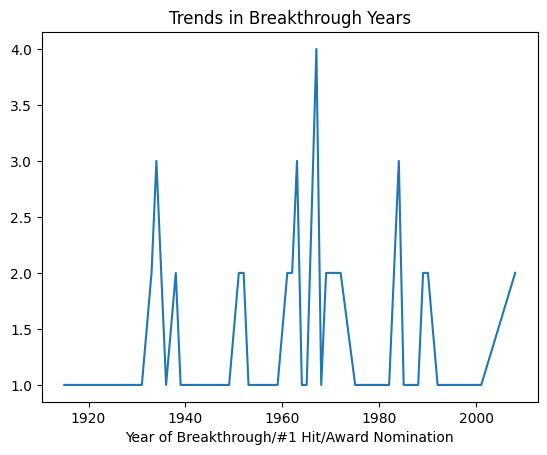

In [53]:
breakthrough_trends = final_df.groupby('Year of Breakthrough/#1 Hit/Award Nomination').size()
breakthrough_trends.plot(kind='line', title='Trends in Breakthrough Years')

Gender wise average carrear span

In [49]:
final_df.groupby('Gender (traditional)')['Carrear_span'].mean()


,Carrear_span
Gender (traditional),
F,33.80
M,35.12


Breakthrough Age vs. Last Major Work Age

<Axes: title={'center': 'Breakthrough Age vs. Last Major Work Age'}, xlabel='Age at Breakthrough', ylabel='Age at Last Major Work'>

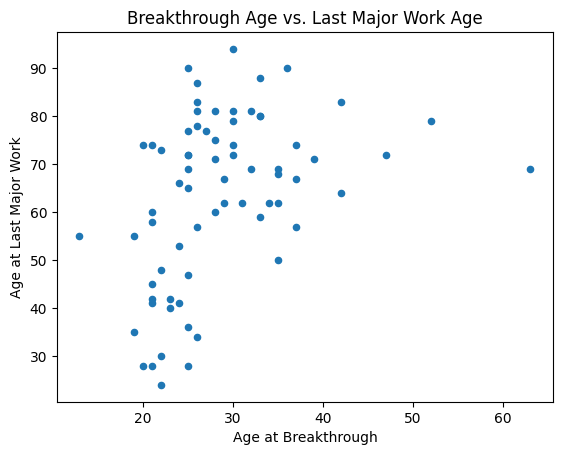

In [56]:
final_df['Age at Last Major Work'] = final_df['Year of Last Major Work (arguable)'] - final_df['Birth Year']
final_df[['Age at Breakthrough', 'Age at Last Major Work']].plot(kind='scatter', x='Age at Breakthrough', y='Age at Last Major Work', title='Breakthrough Age vs. Last Major Work Age')

Years vs Number of awards


Text(0.5, 1.0, 'Histogram of Year of First Oscar/Grammy/Emmy')

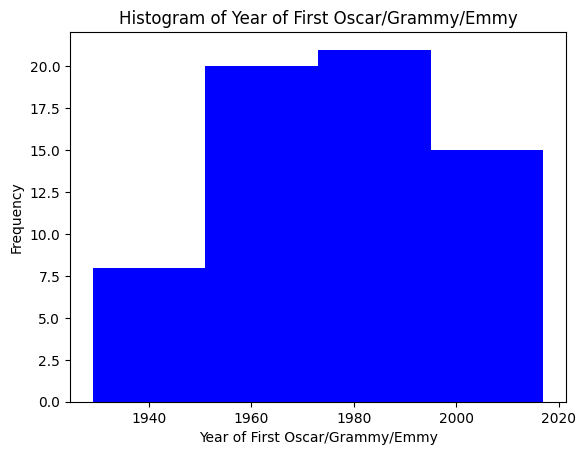

In [59]:
plt.hist(final_df['Year of First Oscar/Grammy/Emmy'],bins = 4,color = 'blue')
plt.xlabel('Year of First Oscar/Grammy/Emmy')
plt.ylabel('Frequency')
plt.title('Histogram of Year of First Oscar/Grammy/Emmy')

Time to get award after breakthrough

In [67]:
final_df['Time to get award after breakthrough'] = final_df['Year of First Oscar/Grammy/Emmy'] - final_df['Year of Breakthrough/#1 Hit/Award Nomination']

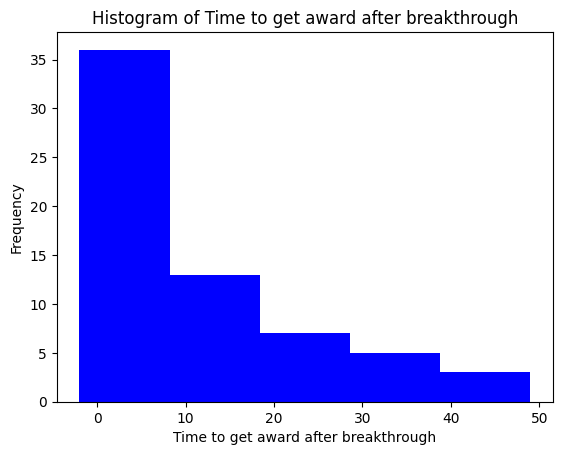

In [68]:
plt.hist(final_df['Time to get award after breakthrough'],bins = 5,color = 'blue')
plt.xlabel('Time to get award after breakthrough')
plt.ylabel('Frequency')
plt.title('Histogram of Time to get award after breakthrough')
plt.show()

Still alive artists details

In [66]:
alive_enterainers = final_df[final_df['Year of Death'].isna()]
print(alive_enterainers[['Entertainer', 'Year of Breakthrough/#1 Hit/Award Nomination', 'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)']])

          Entertainer  Year of Breakthrough/#1 Hit/Award Nomination  \
0               Adele                                          2008   
1      Angelina Jolie                                          1999   
2     Aretha Franklin                                          1967   
4         Betty White                                          1952   
7       Carol Burnett                                          1959   
14    David Letterman                                          1982   
16  Denzel Washington                                          1989   
17      Dick Van Dyke                                          1961   
18  Donald Sutherland                                          1967   
19     Dustin Hoffman                                          1967   
21       Eddie Murphy                                          1980   
22         Elton John                                          1972   
25       Gene Hackman                                          1967   
31    

Artists name those didn't get award

In [72]:
no_awards_enterainers = final_df[final_df['Year of First Oscar/Grammy/Emmy'].isna()]
print(no_awards_enterainers['Entertainer'].reset_index(drop=True))

0     Carole Lombard
1      Carrie Fisher
2          Clara Bow
3    Debbie Reynolds
4        Johnny Depp
5       Wayne Newton
Name: Entertainer, dtype: object


A positive correlation would suggest that earlier breakthroughs are associated with longer careers, while a negative correlation would suggest the opposite.


In [81]:
correlation = final_df['Age at Breakthrough'].corr(final_df['Carrear_span'])
print(correlation)

-0.0659196669684237


In [78]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Gender (traditional)                          70 non-null     object 
 2   Birth Year                                    70 non-null     int64  
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 4   Breakthrough Name                             70 non-null     object 
 5   Year of First Oscar/Grammy/Emmy               64 non-null     float64
 6   Year of Last Major Work (arguable)            70 non-null     int64  
 7   Year of Death                                 30 non-null     float64
 8   Age at Breakthrough                           70 non-null     int64  
 9   Carrear_span                                  70 non-null     int64

Correlation

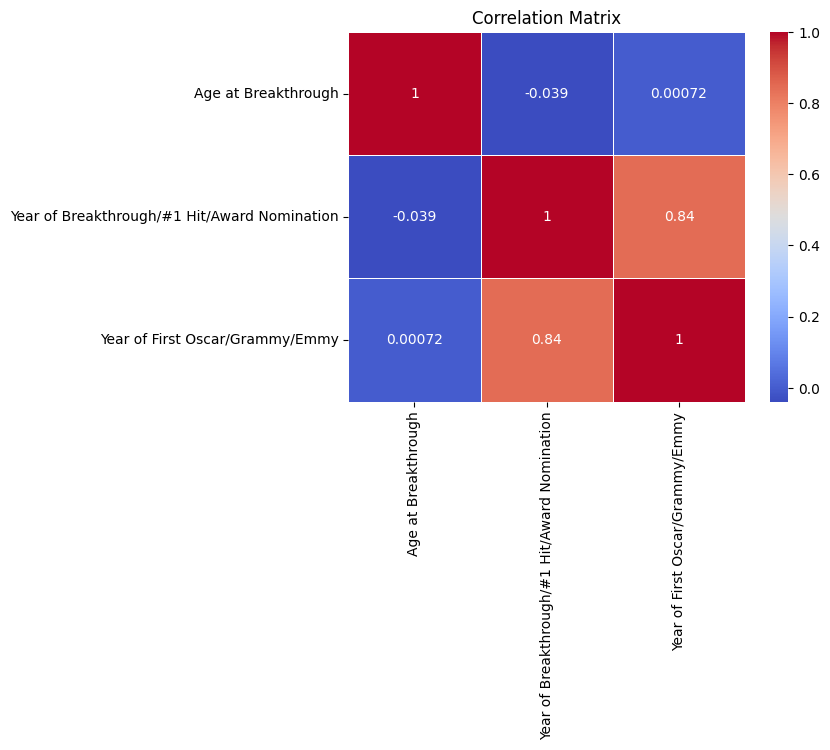

In [82]:
correlation_matrix = final_df[['Age at Breakthrough', 'Year of Breakthrough/#1 Hit/Award Nomination', 'Year of First Oscar/Grammy/Emmy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()